# **Final Project :** 
**Title :** Passenger Satisfaction 
 
**Done By :** Sondos Hosny Deraz

**Abstract :** 

This project analyse dataset taken from kaggle ( https://www.kaggle.com/arpina/passenger-satisfaction/version/1 ), by applying some of data visualization, data preprocessing, Data Analysis ( pandas and numpy ), and machine learning.

### **1. Importing all the liberaries and packages needed.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### **2. Uploading dataset ( csv file ) :**

In [ ]:
df = pd.read_csv('/content/Satisfaction.csv')

#print the first 5 rows only.
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


### **3. Data analysis :**

In [ ]:
# Print a summary of a DataFrame ( index type , non-null values).

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
# checking the number of missing values

df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
#Fill Missing data with Pandas

df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0],inplace=True)

In [ ]:
# checking the number of missing values after filling them.

df.isnull().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
# Summery of dataframe statistics ( min, max, count, ...ect )

df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.045465
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.416353
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


counting values of different columns.

In [ ]:
df.Gender.value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [ ]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [ ]:
df['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

In [ ]:
df['satisfaction_v2'].value_counts()

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64

Getting the max and min in a different method other than (info)


In [ ]:
df['Age'].min()

7

In [ ]:
df['Flight Distance'].max()

6951

### **4. Data visualization :**

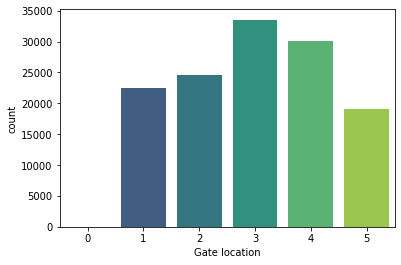

In [ ]:
sns.countplot(x='Gate location', data=df ,palette='viridis')

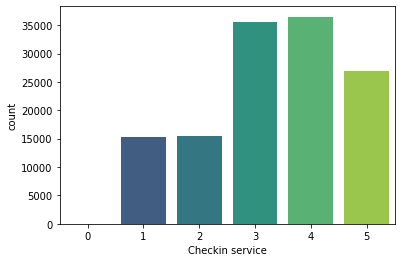

In [ ]:
sns.countplot(x='Checkin service', data=df ,palette='viridis')

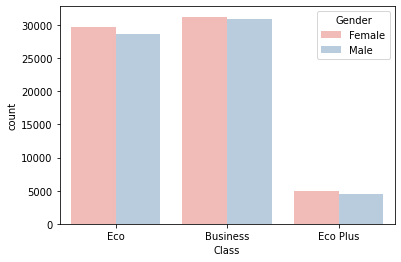

In [ ]:
sns.countplot(x='Class', data=df, hue='Gender', palette='Pastel1')

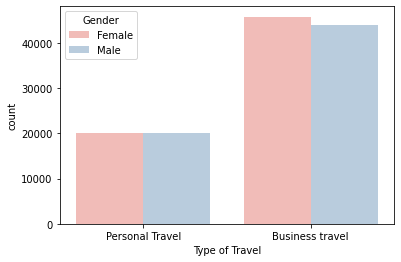

In [ ]:
sns.countplot(x='Type of Travel', data=df, hue='Gender', palette='Pastel1')

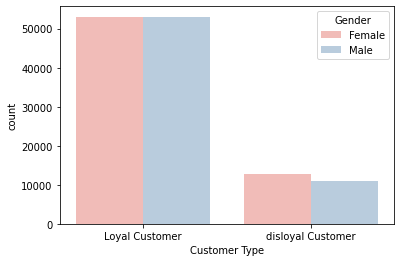

In [ ]:
sns.countplot(x='Customer Type', data=df, hue='Gender', palette='Pastel1')

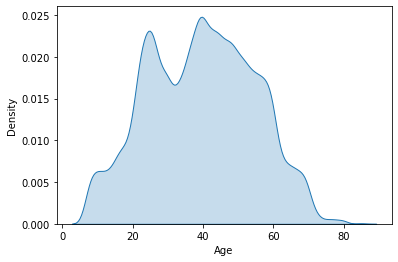

In [ ]:
sns.kdeplot(df['Age'], shade = True )

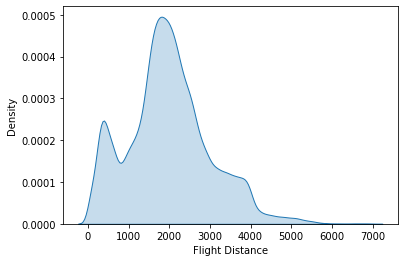

In [ ]:
sns.kdeplot(df['Flight Distance'], shade = True )

In [ ]:
st = df[['Flight Distance' , 'satisfaction_v2']]
st

,Flight Distance,satisfaction_v2
0,265,satisfied
1,2464,satisfied
2,2138,satisfied
3,623,satisfied
4,354,satisfied
...,...,...
129875,1731,satisfied
129876,2087,neutral or dissatisfied
129877,2320,neutral or dissatisfied
129878,2450,neutral or dissatisfied


In [ ]:
st['satisfaction_v2'] = st['satisfaction_v2'].str.replace('satisfied', '1') \
    .str.replace('neutral or dissatisfied', '0') \
    .str.replace('neutral or dis1', '0')
st

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Flight Distance,satisfaction_v2
0,265,1
1,2464,1
2,2138,1
3,623,1
4,354,1
...,...,...
129875,1731,1
129876,2087,0
129877,2320,0
129878,2450,0


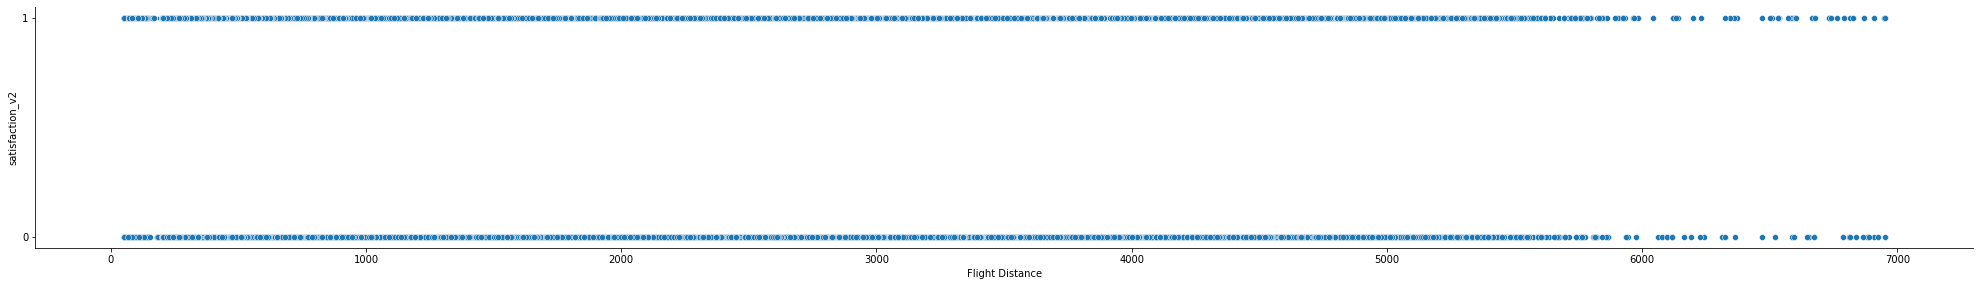

In [ ]:
sns.pairplot( x_vars='Flight Distance', y_vars='satisfaction_v2' , data=st , height=4 ,aspect=7 , diag_kind='auto')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


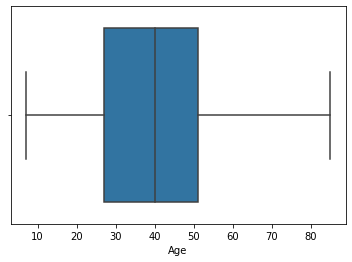

In [ ]:
sns.boxplot(df['Age'] )

In [ ]:
sat = df['satisfaction_v2'].value_counts()
sat

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64

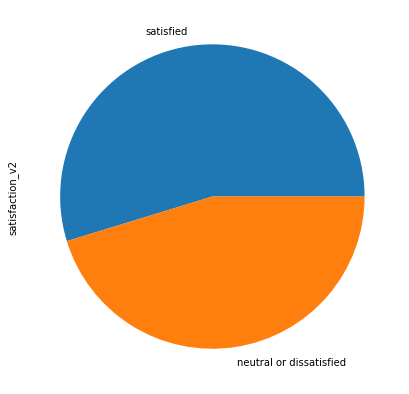

In [ ]:
plot = sat.plot.pie(figsize=(7, 7) )

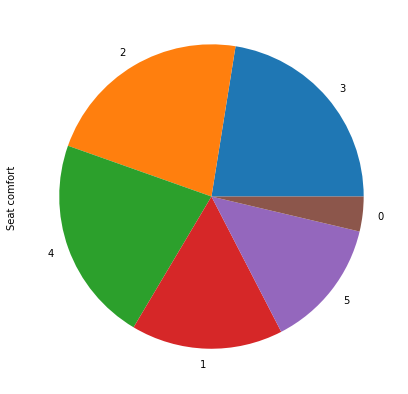

In [ ]:
com = df['Seat comfort'].value_counts()
plot = com.plot.pie(figsize=(7, 7))

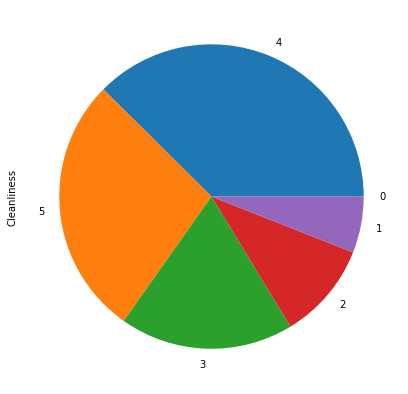

In [ ]:
clean = df['Cleanliness'].value_counts() 
plot = clean.plot.pie(figsize=(7, 7))

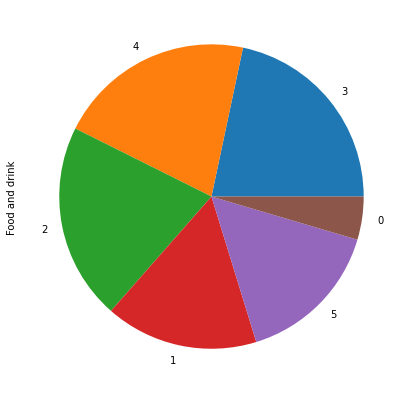

In [ ]:
food = df['Food and drink'].value_counts()
plot = food.plot.pie(figsize=(7, 7))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


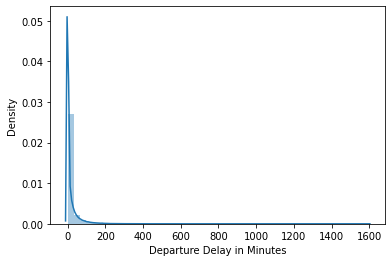

In [ ]:
sns.distplot(df['Departure Delay in Minutes']  )

### **5. Data Preprocessing :**

Work with Ordinal Features with pandas map method.

In [ ]:
df.Gender = df.Gender.replace('Female', 1) \
    .replace('Male', 0) 

In [ ]:
df['Customer Type'] = df['Customer Type'].replace('Loyal Customer', 1) \
    .replace('disloyal Customer', 0)

In [ ]:
df['Class'] = df['Class'].replace('Business', 2) \
    .replace('Eco Plus', 1) \
    .replace('Eco', 0) 

In [ ]:
df['Type of Travel'].unique()
tot = pd.get_dummies(df['Type of Travel'] ,drop_first=True)

In [ ]:
df = df.drop('Type of Travel',axis=1)

In [ ]:
df = pd.concat([df,tot] ,axis=1 )

In [ ]:
df['satisfaction_v2'] = df['satisfaction_v2'].replace('satisfied', 1) \
    .replace('neutral or dissatisfied', 0) \
    .replace('neutral or dis1', 0)

In [ ]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Personal Travel
0,11112,1,1,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1
1,110278,1,0,1,47,2,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1
2,103199,1,1,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1
3,47462,1,1,1,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1
4,120011,1,1,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1


### **6. Machine Learning :**

In [ ]:
# Selecting Feature

x = df.drop(['satisfaction_v2' , 'id'],axis=1)
y = df['satisfaction_v2']

In [ ]:
# Splitting Data 

x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.19,random_state=0)

Model Development and Prediction :

In [ ]:
#fit your model on the train set.

model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#perform prediction on the test set.

y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

Model Evaluation using Confusion Matrix :

In [ ]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[ 7398,  3705],
       [ 2214, 11361]])

In [ ]:
print((accuracy_score(y_test,y_pred))*100)

76.01507415511793


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71     11103
           1       0.75      0.84      0.79     13575

    accuracy                           0.76     24678
   macro avg       0.76      0.75      0.75     24678
weighted avg       0.76      0.76      0.76     24678

